<a id="table"></a>
<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Table of Contents</h1>


- [Libraries and Dependencies](#1)

- [Data Description](#2)

- [Data Loading and Preprocessing](#3)

- [Exploratory Data Analysis (EDA)](#4)

- [Cross Validation Set](#5)
  - [Training](#5.1)
    - [RandomForestClassifier](#5.1.1)
    - [XGBoost](#5.1.2)
    - [Light GBM](#5.1.3)
    - [DecisionTreeClassifier](#5.1.4)
    - [Logistic Regression](#5.1.5)
  - [Scores](#5.2)
  
  
- [Model Training](#6)
  - [RandomForestClassifier](#6.1)
  - [XGBoost](#6.2)
  - [Light GBM](#6.3)
  - [DecisionTreeClassifier](#6.4)
  - [Logistic Regression](#6.5)
  
- [Predictions](#7)

- [Submissions](#8)

<a id="1"></a>
<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Libraries and Dependencies</h1>

In [1]:
import numpy as np  # linear algebra

# Importing methods for preprocessing and data handling
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Models
import lightgbm as lgb
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

<a id="2"></a>
<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Data Description</h1>



Columns

* **id**: Unique identifier for each entry.
* **trans_date_trans_time**: The date and time of the transaction.
* **cc_num**: Credit card number.
* **merchant**: Merchant receiving payment.
* **category**: Area of merchant's business.
* **amt**: Amount in American Dollars.
* **first**: First name of the cardholder.
* **last**: Last name of the cardholder.
* **gender**: Gender of the cardholder (Male/Female).
* **street**: Street of cardholder's residence.
* **city**: City of cardholder's residence.
* **state**: State of cardholder's residence.
* **zip**: ZIP code of cardholder's residence.
* **lat**: Latitude of the cardholder.
* **long**: Longitude of the cardholder.
* **city_pop**: Population of the city.
* **job**: Occupation of the cardholder.
* **dob**: Date of birth of the cardholder.
* **trans_num**: Transaction ID.
* **unix_time**: Unix time (time since 1970).
* **merch_lat**: Latitude of the merchant.
* **merch_long**: Longitude of the merchant.
* **is_fraud**: Binary flag indicating whether the transaction is fraud (1) or not (0).

<a id="3"></a>
<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Data Loading and Preprocessing</h1>

**Loading Data**

In [2]:
df = pd.read_csv("/kaggle/input/anyas-gojo-revival-bondman/trainData.csv")
dftest=pd.read_csv("/kaggle/input/anyas-gojo-revival-bondman/testData.csv")

**Preprocessing Training Data**

We will make copy datasets to perform furthur operations

In [3]:
dfm = df.copy()
dftestf=dftest.copy()

In [4]:
dfm.shape

(523174, 23)

In [5]:
dfm.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,...,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,35.189455,-90.121666,0
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,49.004316,-122.745016,0
2,3,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,Monica,Lane,F,3270 Scott Islands,...,44.6084,-70.6993,190,Animal nutritionist,1970-04-17,c8fcf575540e37ce0822cd040148ff57,1361012178,44.455449,-70.809148,0
3,4,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,David,Lewis,M,1499 Michael Rue,...,38.8954,-77.1633,207410,Mudlogger,1984-07-03,9e9cde0e0963ac746a2cc9938e171c9a,1367338456,39.476941,-77.613438,0
4,5,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,Ronald,Carson,M,870 Rocha Drive,...,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,0742473d7f6261ce366b43ece063faf3,1354741679,40.863808,-74.674018,0


In [6]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     523174 non-null  int64  
 1   trans_date_trans_time  523174 non-null  object 
 2   cc_num                 523174 non-null  int64  
 3   merchant               523174 non-null  object 
 4   category               523174 non-null  object 
 5   amt                    523174 non-null  float64
 6   first                  523174 non-null  object 
 7   last                   523174 non-null  object 
 8   gender                 523174 non-null  object 
 9   street                 523174 non-null  object 
 10  city                   523174 non-null  object 
 11  state                  523174 non-null  object 
 12  zip                    523174 non-null  int64  
 13  lat                    523174 non-null  float64
 14  long                   523174 non-nu

In [7]:
null_entries = dfm.isnull().sum()
print("Null entries in the entire DataFrame:")
print(null_entries)

Null entries in the entire DataFrame:
id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


There are no null values in the train dataset


In [8]:
dfm.describe()

,id,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,523174.000000,5.231740e+05,523174.000000,523174.000000,523174.000000,523174.000000,5.231740e+05,5.231740e+05,523174.000000,523174.000000,523174.000000
mean,261587.500000,4.179945e+17,74.126999,48778.123106,38.545987,-90.222333,8.851568e+04,1.349238e+09,38.546871,-90.222705,0.014347
std,151027.469204,1.309874e+18,164.627380,26915.789078,5.072909,13.774292,3.007854e+05,1.285058e+07,5.106024,13.786031,0.118917
min,1.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.032277,-166.664828,0.000000
25%,130794.250000,1.800429e+14,9.700000,26041.000000,34.668900,-96.798000,7.430000e+02,1.338738e+09,34.751576,-96.901801,0.000000
50%,261587.500000,3.521417e+15,47.680000,48154.000000,39.371600,-87.461600,2.456000e+03,1.349243e+09,39.372253,-87.426508,0.000000
75%,392380.750000,4.642255e+15,83.870000,72042.000000,41.940400,-80.158000,2.032800e+04,1.359389e+09,41.958544,-80.219874,0.000000
max,523174.000000,4.992346e+18,15047.030000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.510267,-66.950902,1.000000


In [9]:
dfm.columns

Index(['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

<a id="4"></a>
<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Exploratory Data Analysis</h1>

Using a single 'name' column is more beneficial from a feature engineering perspective than having separate 'first name' and 'last name' columns.



In [10]:
dfm['name'] = dfm['first'] + ' ' + dfm['last']

I am removing the 'trans_num' column from the dataset since it contains entirely unique values, making it an unsuitable parameter for training.

'first' & 'last' colums are dropped since I have included complete name in 'name' column.

In [11]:
dfm = dfm.drop(['trans_num','first', 'last'], axis=1)

In [12]:
dfm['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.985653
1    0.014347
Name: proportion, dtype: float64

Approximately out of every 69 transactions 1 is fraud.



In [13]:
dfm['amt'].value_counts()
#amtcount=dfm['amt'].value_counts()
#pd.set_option('display.max_rows', None)  
#print(amtcount)

amt
1.05      231
1.04      231
1.11      227
1.12      225
1.14      220
         ... 
521.31      1
382.69      1
755.85      1
981.96      1
304.90      1
Name: count, Length: 39741, dtype: int64

The 'amt' column seems skewed. We will furthur check it through distplot

/tmp/ipykernel_19/734007364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfm['amt'])


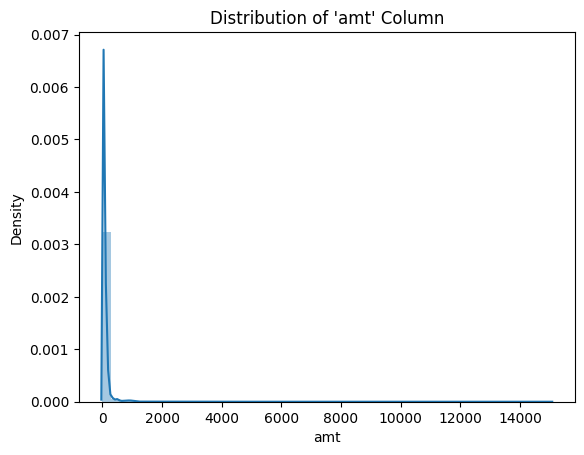

In [14]:
sns.distplot(dfm['amt'])
plt.title("Distribution of 'amt' Column")
plt.show()

It is highly skewed so we need to tranform it

In [15]:
dfm['amt'] = np.log1p(dfm['amt'])

/tmp/ipykernel_19/2435525417.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfm['amt'])


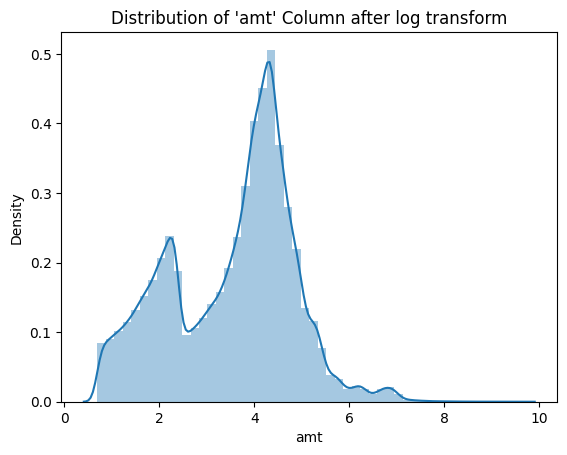

In [16]:
sns.distplot(dfm['amt'])
plt.title("Distribution of 'amt' Column after log transform")
plt.show()

In [17]:
dfm["gender"].value_counts(normalize=True) #normalize=true returns the relative frequencies of each unique value

gender
F    0.546667
M    0.453333
Name: proportion, dtype: float64

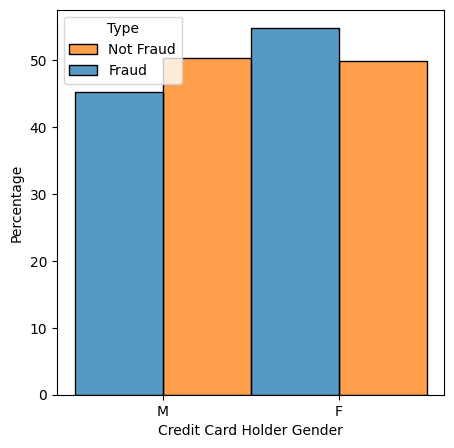

In [18]:
plt.figure(figsize=(5,5))
ax = sns.histplot(x='gender', data=dfm, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False)
#dodge helps us create distinct bars for each category within the 'gender' variable
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Not Fraud', 'Fraud'])
plt.show()

Since both male and female have good contribution in both fraud and not fraud cases so 'gender' is not a good feature for training data.

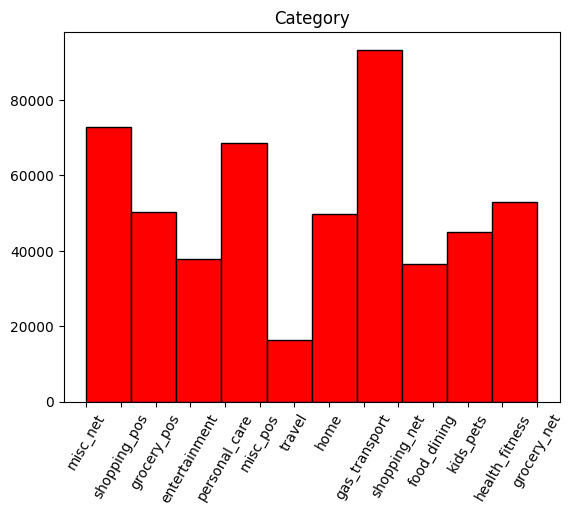

In [19]:
plt.hist(dfm["category"], color="red", edgecolor="black")
plt.xticks(rotation=60)
plt.title("Category")
plt.show()

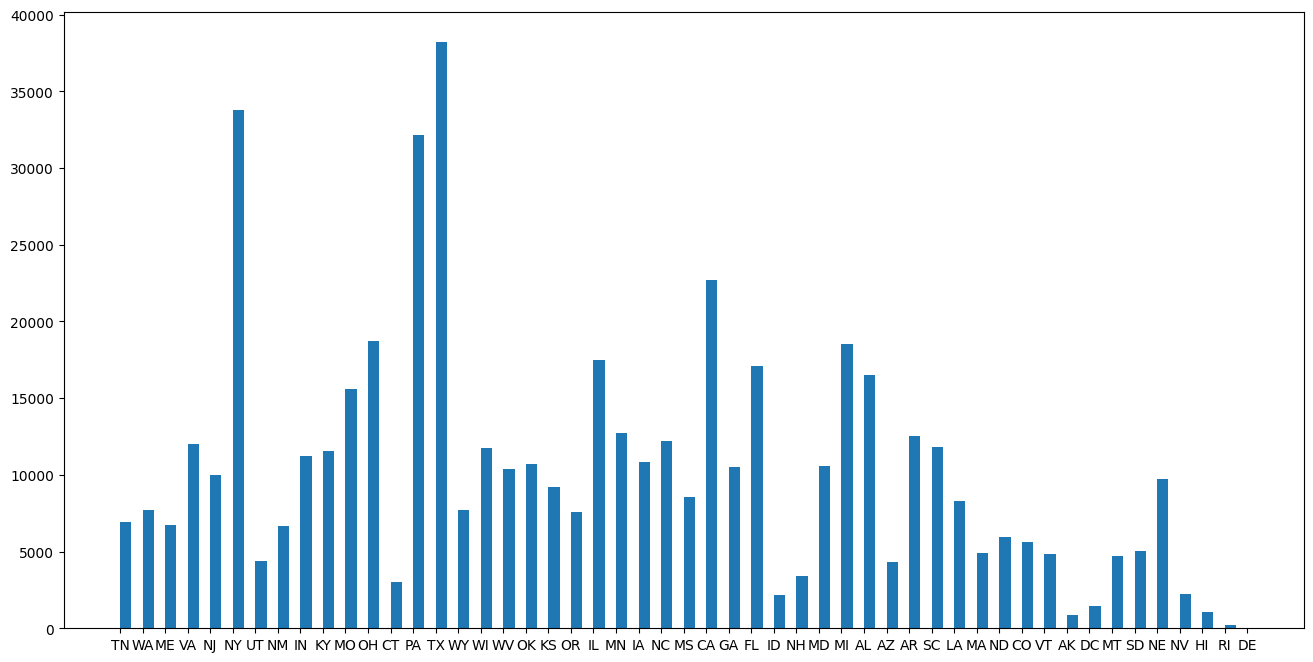

In [20]:
plt.figure(figsize=(16, 8))
plt.hist((dfm["state"]), bins=100)
plt.show()

In [21]:
dfm['trans_date_trans_time']=pd.to_datetime(dfm['trans_date_trans_time'])#converting it from object type to date-time
dfm['trans_date']=dfm['trans_date_trans_time'].dt.strftime('%Y-%m-%d')#store date of transaction in a separate column


Date of fraud transaction can be a important feature while training  so I extracted it from 'trans_date_trans_time' column and created a new column 'trans_date' to store date of transaction.

In [22]:
dfm['dob']=pd.to_datetime(dfm['dob'])
dfm['trans_date']=pd.to_datetime(dfm['trans_date'])#This conversion will help me to perform date-related operations easily.

In [23]:
dfm['age']=dfm['trans_date'].dt.year-dfm['dob'].dt.year

I created a new column 'age' where I am storing the age of the person while performing the transaction as this might be a good feature from feature engineering point of view.

Text(0, 0.5, 'Density')

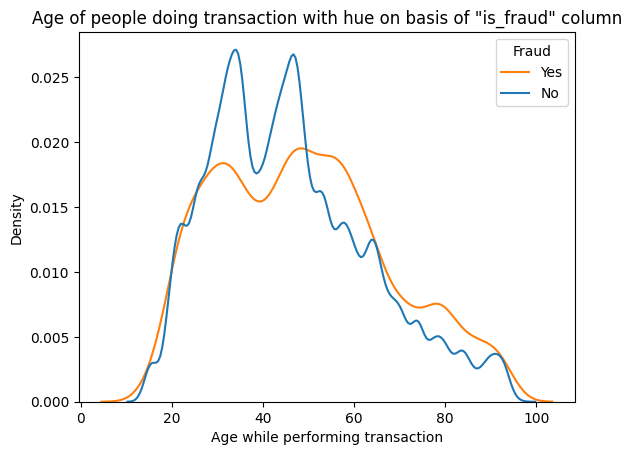

In [24]:
ageplot=sns.kdeplot(x='age',data=dfm, hue='is_fraud', common_norm=False)
plt.title('Age of people doing transaction with hue on basis of "is_fraud" column')
plt.legend(title='Fraud', labels=['Yes', 'No'])
ageplot.set_xlabel('Age while performing transaction')
ageplot.set_ylabel('Density')

Text(0.5, 0, 'Hour')

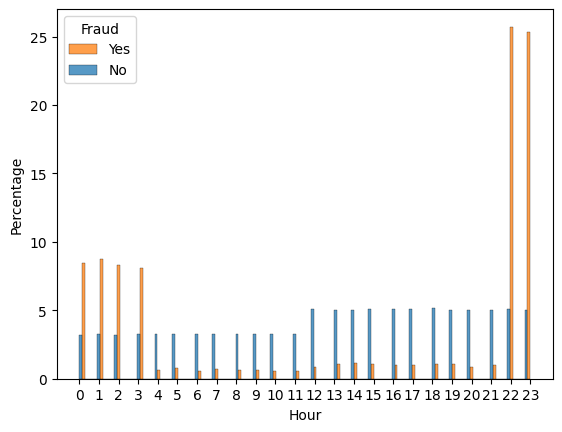

In [25]:
dfm['hour']=dfm['trans_date_trans_time'].dt.hour #separate column for hour of transaction
Hourplot=sns.histplot(data=dfm, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Fraud', labels=['Yes', 'No'])
Hourplot.set_ylabel('Percentage')
Hourplot.set_xlabel('Hour')

We can see there is huge increase in fraud transaction from 2200hrs to 0300hrs.

/tmp/ipykernel_19/1221999956.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  dayplot.set_xticklabels(['',"Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])


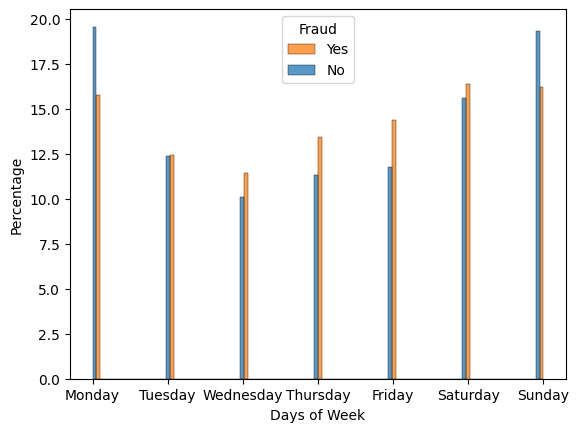

In [26]:
dfm['day']=dfm['trans_date_trans_time'].dt.dayofweek
dayplot=sns.histplot(data=dfm, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
dayplot.set_xticklabels(['',"Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
dayplot.set_ylabel('Percentage')
dayplot.set_xlabel('Days of Week')
plt.legend(title='Fraud', labels=['Yes', 'No'])

Slight spike is seen in fraud transactions around weekends.

Similar analysis I will do for month of fraud transaction.

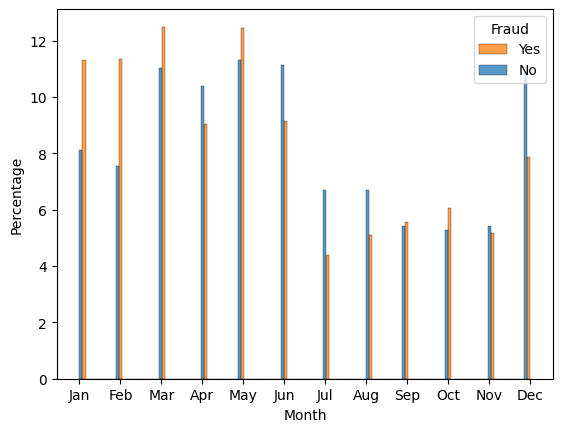

In [27]:
dfm['month']=dfm['trans_date_trans_time'].dt.month
mplot=sns.histplot(data=dfm, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
mplot.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
mplot.set_ylabel('Percentage')
mplot.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Fraud', labels=['Yes', 'No'])

I am selecting the features which I consider important for training my model

In [28]:
train = dfm[['category', 'amt', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month', 'is_fraud']]
categoryints = pd.get_dummies(train['category'], prefix='category', drop_first=True)
categoryints = categoryints.astype(int)# Replace boolean values with 0s and 1s
train = train.drop('category', axis=1)
train = pd.concat([train, categoryints], axis=1)
y_train = train['is_fraud']
X_train = train.drop("is_fraud", axis=1)

Similar operations on test dataset

In [29]:
dftestf['trans_date_trans_time']=pd.to_datetime(dftestf['trans_date_trans_time'])
dftestf['trans_date']=dftestf['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
dftestf['trans_date']=pd.to_datetime(dftestf['trans_date'])
dftestf['dob']=pd.to_datetime(dftestf['dob'])
dftestf['amt'] = np.log1p(dftestf['amt'])
dftestf['age']=dftestf['trans_date'].dt.year-dftestf['dob'].dt.year
dftestf['hour']=dftestf['trans_date_trans_time'].dt.hour
dftestf['day']=dftestf['trans_date_trans_time'].dt.dayofweek
dftestf['month']=dftestf['trans_date_trans_time'].dt.month
testf = dftestf[['category', 'amt', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 'age', 'hour', 'day', 'month']]
categorytest = pd.get_dummies(testf['category'], prefix='category', drop_first=True)
categorytest = categorytest.astype(int)
testf = testf.drop('category', axis=1)
testf = pd.concat([testf, categorytest], axis=1)

**Handling Imbalanced nature of Train Dataset** ***using SMOTE (Synthetic Minority Oversampling Technique)***

In [30]:
sm = SMOTE(random_state=42)#since only 1 one out of 69 transaction is fraud. So I am doing oversampling
X_train_new,y_train_new=sm.fit_resample(X_train,y_train)

I opted for oversampling in this case because, during the initial trial and testing, it yielded higher scores compared to undersampling.

In [31]:
y_train.value_counts()

is_fraud
0    515668
1      7506
Name: count, dtype: int64

In [32]:
y_train_new.value_counts()

is_fraud
0    515668
1    515668
Name: count, dtype: int64

Now the train dataset is balanced

<a id="5"></a>
<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Cross Validation Set</h1>

In [33]:
X_traincv,X_testcv,y_traincv,y_testcv = train_test_split(X_train_new,y_train_new,test_size = 0.3, random_state = 42) 
#cross validation

<a id="5.1"></a>
<h1><i><b>Training</b></i></h1>

<a id="5.1.1"></a>
<h3><u><b>RandomForestClassifier</b></u></h3>

In [34]:
best_rfc_params={'n_estimators': 1350,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 1022,
 'criterion': 'entropy'}
rfc=RandomForestClassifier(**best_rfc_params)
rfc.fit(X_traincv,y_traincv)
y_predcv=rfc.predict(X_testcv)
rfc_roc=roc_auc_score(y_testcv,y_predcv)
rfc_acc=accuracy_score(y_testcv,y_predcv)
print("Confusion Matrix: ",confusion_matrix(y_testcv,y_predcv))
print("Accuracy Score: ",rfc_acc)
print("ROC_AUC_Score: ",rfc_roc)

Confusion Matrix:  [[153344   1254]
 [   338 154465]]
Accuracy Score:  0.994854573837835
ROC_AUC_Score:  0.9948526099986568


<a id="5.1.2"></a>
<h3><u><b>XGBoost</b></u></h3>

In [35]:
best_xgb_params={'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.5}
xg=xgboost.XGBClassifier(**best_xgb_params)
xg.fit(X_traincv,y_traincv)
y_predcv=xg.predict(X_testcv)
xgb_roc=roc_auc_score(y_testcv,y_predcv)
xgb_acc=accuracy_score(y_testcv,y_predcv)
print("Confusion Matrix: ",confusion_matrix(y_testcv,y_predcv))
print("Accuracy Score: ",xgb_acc)
print("ROC_AUC_Score: ",xgb_roc)

Confusion Matrix:  [[153659    939]
 [   217 154586]]
Accuracy Score:  0.9962637483395335
ROC_AUC_Score:  0.9962622005628532


<a id="5.1.3"></a>
<h3><u><b>Light GBM</b></u></h3>

In [36]:
best_lgb_params={'learning_rate': 0.045, 'n_estimators': 2000}
lgbmcv=lgb.LGBMClassifier(**best_lgb_params)
lgbmcv.fit(X_traincv,y_traincv)
y_predcv=lgbmcv.predict(X_testcv)
lgbm_roc=roc_auc_score(y_testcv,y_predcv)
lgbm_acc=accuracy_score(y_testcv,y_predcv)
print("Confusion Matrix: ",confusion_matrix(y_testcv,y_predcv))
print("Accuracy Score: ",lgbm_acc)
print("ROC_AUC_Score: ",lgbm_roc)

Confusion Matrix:  [[153412   1186]
 [   148 154655]]
Accuracy Score:  0.9956884431530603
ROC_AUC_Score:  0.9956862184214342


<a id="5.1.4"></a>
<h3><u><b>DecisionTreeClassifier</b></u></h3>

In [37]:
best_dtc_params={'max_depth': 207, 'min_samples_split': 0.01,
                 'criterion': 'entropy', 'max_features': None}

dtc=DecisionTreeClassifier(**best_dtc_params)
dtc.fit(X_traincv,y_traincv)
y_predcv=dtc.predict(X_testcv)
dtc_roc=roc_auc_score(y_testcv,y_predcv)
dtc_acc=accuracy_score(y_testcv,y_predcv)
print("Confusion Matrix: ",confusion_matrix(y_testcv,y_predcv))
print("Accuracy Score: ",dtc_acc)
print("ROC_AUC_Score: ",dtc_roc)

Confusion Matrix:  [[147189   7409]
 [  4745 150058]]
Accuracy Score:  0.9607176447393512
ROC_AUC_Score:  0.9607119226363026


<a id="5.1.5"></a>
<h3><u><b>Logistic Regression</b></u></h3>

In [38]:
best_lr_params={'C': 85539.17794889913, 'penalty': 'l1','solver':'liblinear'}

lrc=LogisticRegression(**best_lr_params)
lrc.fit(X_traincv,y_traincv)
y_predcv=lrc.predict(X_testcv)
lrc_roc=roc_auc_score(y_testcv,y_predcv)
lrc_acc=accuracy_score(y_testcv,y_predcv)
print("Confusion Matrix: ",confusion_matrix(y_testcv,y_predcv))
print("Accuracy Score: ",lrc_acc)
print("ROC_AUC_Score: ",lrc_roc)

Confusion Matrix:  [[141828  12770]
 [  7567 147236]]
Accuracy Score:  0.9342697664196302
ROC_AUC_Score:  0.9342585955307738


<a id="5.2"></a>
<h1><i><b>Scores</b></i></h1>

In [39]:

models = [('Random Forest Classifier', rfc_acc, rfc_roc),
          ('XGBoost Classifier', xgb_acc, xgb_roc),
          ('LightGBM', lgbm_acc, lgbm_roc),
          ('Decision Tree Classifier', dtc_acc, dtc_roc),
          ('Logistic Regression', lrc_acc, lrc_roc)
         ]

modelsdf = pd.DataFrame(data=models, columns=['Model', 'Accuracy', 'ROC_AUC Score']) \
                    .sort_values(by='ROC_AUC Score', ascending=False)

print(modelsdf)


                      Model  Accuracy  ROC_AUC Score
1        XGBoost Classifier  0.996264       0.996262
2                  LightGBM  0.995688       0.995686
0  Random Forest Classifier  0.994855       0.994853
3  Decision Tree Classifier  0.960718       0.960712
4       Logistic Regression  0.934270       0.934259


The output above is sorted in DESCENDING order of ROC_AUC Score

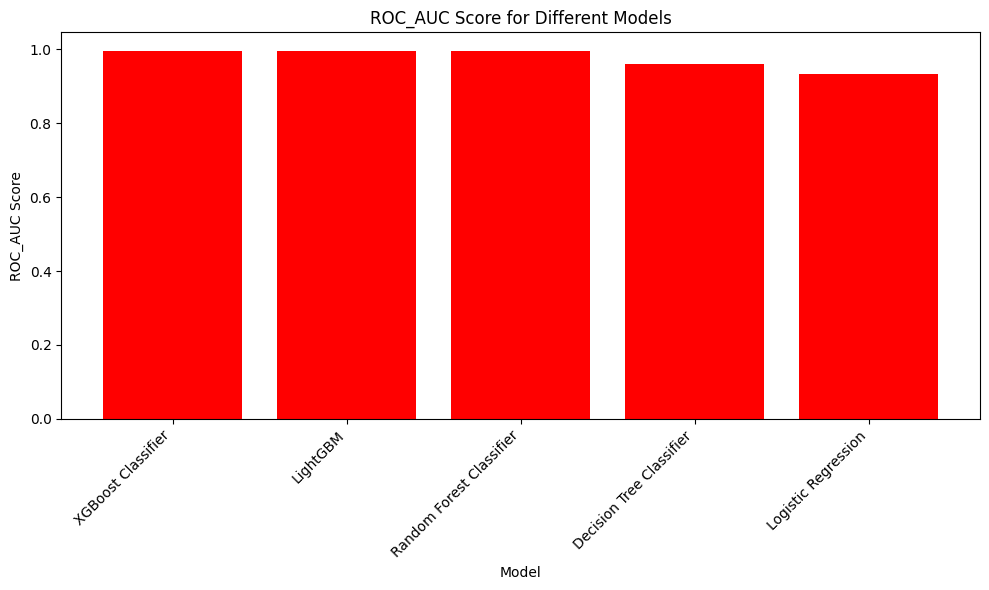

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(modelsdf['Model'], modelsdf['ROC_AUC Score'], color='red')
plt.xlabel('Model')
plt.ylabel('ROC_AUC Score')
plt.title('ROC_AUC Score for Different Models')
plt.xticks(rotation=45, ha='right')#ha='right' specifies horizontal alignment of the tick labels, aligning them to the right
plt.tight_layout()#adjusts subplot parameters to prevent overlapping of labels, titles, and other elements within the figure
plt.show()

<a id = "6"></a>
<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Model Training</h1>

<a id="6.1"></a>
<h5><u><b>RandomForestClassifier</b></u></h5>

In [41]:
rfcf=RandomForestClassifier(**best_rfc_params)
rfcf.fit(X_train_new,y_train_new)

RandomForestClassifier(criterion='entropy', max_depth=1022, max_features='log2',
                       min_samples_split=5, n_estimators=1350)

<a id="6.2"></a>
<h5><u><b>XGBoost</b></u></h5>

In [42]:
xgf=xgboost.XGBClassifier(**best_xgb_params)
xgf.fit(X_train_new,y_train_new)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<a id="6.3"></a>
<h5><u><b>Light GBM</b></u></h5>

In [43]:
lgbmf=lgb.LGBMClassifier(**best_lgb_params)
lgbmf.fit(X_train_new,y_train_new)

LGBMClassifier(learning_rate=0.045, n_estimators=2000)

<a id="6.4"></a>
<h5><u><b>DecisionTreeClassifier</b></u></h5>

In [44]:
dtcf=DecisionTreeClassifier(**best_dtc_params)
dtcf.fit(X_train_new,y_train_new)

DecisionTreeClassifier(criterion='entropy', max_depth=207,
                       min_samples_split=0.01)

<a id="6.5"></a>
<h5><u><b>Logistic Regression</b></u></h5>

In [45]:
lrcf=LogisticRegression(**best_lr_params)
lrcf.fit(X_train_new,y_train_new)

LogisticRegression(C=85539.17794889913, penalty='l1', solver='liblinear')

<a id = "7"></a>
<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Predictions</h1>

Making predictions on the test set using Random Forest, XGBoost, LightGBM, Decision Tree and Logistic Regression.

In [46]:
y_testfrfcf=rfcf.predict(testf)
y_testfxgf=xgf.predict(testf)
y_testflgbmf=lgbmf.predict(testf)
y_testfdtcf=dtcf.predict(testf)
y_testflrcf=lrcf.predict(testf)

<a id = "8"></a>
<h1 style="background-color:#0F0F0F;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;color:#F0F0F0">Submissions</h1>

Creating submission DataFrames for each model and saving predictions in CSV files 

In [47]:
submissionrfcf=pd.DataFrame(data={'id': range(1, len(testf)+1), 'is_fraud': y_testfrfcf})
submissionrfcf.to_csv('rfc.csv', index=False)#index=false means not including row numbers in the CSV file.
submissionxgf=pd.DataFrame(data={'id': range(1, len(testf)+1), 'is_fraud': y_testfxgf})
submissionxgf.to_csv('xg.csv', index=False)
submissionlgbmf=pd.DataFrame(data={'id': range(1, len(testf)+1), 'is_fraud': y_testflgbmf})
submissionlgbmf.to_csv('lgbm.csv', index=False)
submissiondtcf=pd.DataFrame(data={'id': range(1, len(testf)+1), 'is_fraud': y_testfdtcf})
submissiondtcf.to_csv('dtc.csv', index=False)
submissionlrf=pd.DataFrame(data={'id': range(1, len(testf)+1), 'is_fraud': y_testflrcf})
submissionlrf.to_csv('lr.csv', index=False)